<font color='green' size='7'>**Домашняя работа**</font>  
<font color='#11a642' size='6'>**Тема: Машинное обучение. Ансамбли моделей**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s5e5  

**Что нужно сделать:**

1. Загрузить данные c конкурса  https://www.kaggle.com/competitions/playground-series-s5e5
2. Построить ансамбли моделей


**Форма загрузки на платформу:** строго файл ipynb. Перед загрузкой еще раз запустите ноутбук, убедившись, что все работает корректно без ошибок






# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [1]:
import pandas as pd

# <font color='#11a642' size='6'> **Загрузка данных**

In [2]:
!gdown 1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C

Downloading...
From: https://drive.google.com/uc?id=1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C
To: /Users/antontravkin/Sites/python_rtk/part 2/train_сalories.csv
100%|██████████████████████████████████████| 35.5M/35.5M [00:07<00:00, 5.02MB/s]


In [3]:
try:
  df = pd.read_csv('/content/train_сalories.csv')
except:
  df = pd.read_csv('train_сalories.csv')

In [4]:
# на этих данных дальше необходимо разработать модель
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


## <font color='#11a642' size='5'> Роли для переменных

In [5]:
target = 'Calories'
cat_features = ['Sex']
num_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

# <font color='#11a642' size='6'> **Разведочный анализ данных**

<font color='#11a642' size='5'>
Оцените размер вашего датасета  

1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [10]:
# Сколько ГБ ваш датасет
# ваш код
import os

file_size_bytes = os.path.getsize('train_сalories.csv')
file_size_gb = file_size_bytes / (1024**3)
print(f"Размер файла train.csv: {file_size_gb:.4f} ГБ")

Размер файла train.csv: 0.0330 ГБ


<font color='#11a642' size='5'>
Рекомендуется:

- посмотреть на `df.info()`, `df.describe()`
- визуализировать распределения целевой переменной и признаков (гистограммы, boxplot)
- посмотреть на корреляции (`df.corr()`)
- проверить пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB
id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


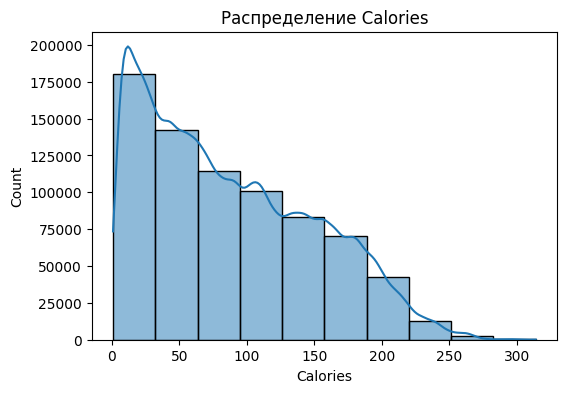

In [11]:
# ваш код
import matplotlib.pyplot as plt
import seaborn as sns

df.info()
df.describe()

# Проверим пропуски
print(df.isnull().sum())

# Распределение целевой переменной
plt.figure(figsize=(6, 4))
sns.histplot(df['Calories'], bins=10, kde=True)
plt.title('Распределение Calories')
plt.show()

# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [12]:
# ваш код
from sklearn.model_selection import train_test_split

# Кодирование категориальной переменной
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

X = df_encoded.drop(columns=[target, 'id'])
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# <font color='#11a642' size='6'> **Построение моделей**

## <font color='#11a642' size='5'> Построение модели **Random Forest**. Гиперпараметры подберите либо вручную, либо с помощью GridSearchCV или RandomizedSearchCV


- необходимо ли обрабатывать категориальные признаки заранее?
- необходимо ли обрабатывать пропуски?

In [13]:
# ваш код
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## <font color='#11a642' size='5'> Построение модели бустинга **XGBoost**. Гиперпараметры подберите либо вручную, либо с помощью GridSearchCV или RandomizedSearchCV


- необходимо ли обрабатывать категориальные признаки заранее?
- необходимо ли обрабатывать пропуски?

In [21]:
# ваш код
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

## <font color='#11a642' size='5'> Построение модели бустинга **LightGBM**. Гиперпараметры подберите либо вручную, либо с помощью GridSearchCV или RandomizedSearchCV


- необходимо ли обрабатывать категориальные признаки заранее?
- необходимо ли обрабатывать пропуски?

In [19]:
# ваш код
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

# Базовая модель
lgbm = LGBMRegressor(random_state=42)

# Сетка гиперпараметров для подбора
param_dist = {
    'num_leaves': [15, 31, 50],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

# RandomizedSearchCV для быстрого подбора
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Запуск подбора
random_search.fit(X_train, y_train)

# Лучшая модель
best_lgbm = random_search.best_estimator_

# Предсказания
lgbm_pred = best_lgbm.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.090681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 361
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 7
[LightGBM] [Info] Start training from score 88.336845
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.079681 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040116 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 7
[LightGBM] [Info] Total Bins 359
[LightGBM] [Info] Number of data points in the train set: 400000, number of used features: 7
[LightGBM] [Info] Aut

## <font color='#11a642' size='5'> Построение модели бустинга **Catboost**. Гиперпараметры подберите либо вручную, либо с помощью GridSearchCV или RandomizedSearchCV


- необходимо ли обрабатывать категориальные признаки заранее?
- необходимо ли обрабатывать пропуски?

In [16]:
# ваш код
from catboost import CatBoostRegressor

cat = CatBoostRegressor(verbose=0, random_state=42)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

## <font color='#11a642' size='5'> Выводы:

### <font color='#11a642' size='4'>
- Какая модель оказалась более стабильной и лучше по метрикам?
- Какая модель требует меньше дополнительных обработок данных?
- Какую модель вы выбираете и почему?

In [22]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score


def print_metrics(name, y_true, y_pred):
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", root_mean_squared_error(y_true, y_pred))
    print("R2:", r2_score(y_true, y_pred))


print_metrics("Random Forest", y_test, rf_pred)
print_metrics("XGBoost", y_test, xgb_pred)
print_metrics("CatBoost", y_test, cat_pred)
print_metrics("LightGBM", y_test, lgbm_pred)


Random Forest
MAE: 2.3097405477973876
RMSE: 3.8229465040243538
R2: 0.9962290068644032

XGBoost
MAE: 2.3534548784487446
RMSE: 3.8011551589106967
R2: 0.9962718747455283

CatBoost
MAE: 2.122493699685588
RMSE: 3.5561426195508994
R2: 0.9967369957428663

LightGBM
MAE: 2.42486694904036
RMSE: 3.847162031634791
R2: 0.9961810826783387


CatBoost показывает лучшие результаты по всем метрикам 